In [1]:
from caricatore_immagini import ImageLoader

In [2]:
train_dir = "images/FER2013Train"
val_dir = "images/FER2013Valid"
test_dir = "images/FER2013Test"

train_csv = "data/FER2013Train/label_train.csv"
val_csv = "data/FER2013Valid/label_valid.csv"
test_csv = "data/FER2013Test/label_test.csv"

In [3]:
train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()


In [4]:
import numpy as np
labels = np.argmax(y_train, axis=1)

# Ottieni le etichette uniche e il conteggio di ciascuna
unique_labels, counts = np.unique(labels, return_counts=True)

# Stampa la distribuzione delle etichette
for label, count in zip(unique_labels, counts):
    print(f"Etichetta {label}: {count} occorrenze")

# Visualizza un grafico a barre della distribuzione
plt.bar(unique_labels, counts)
plt.xlabel('Etichette')
plt.ylabel('Conteggio')
plt.title('Distribuzione delle etichette in y_train')
plt.show()

Etichetta 0: 10247 occorrenze
Etichetta 1: 7514 occorrenze
Etichetta 2: 3544 occorrenze
Etichetta 3: 3511 occorrenze
Etichetta 4: 2450 occorrenze
Etichetta 5: 190 occorrenze
Etichetta 6: 653 occorrenze
Etichetta 7: 168 occorrenze
Etichetta 8: 170 occorrenze


NameError: name 'plt' is not defined

In [5]:
test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

In [6]:
val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

In [8]:
'''# Cella per eliminare dati dove NF è >0, vanno inseriti i 3 csv relativi
import pandas as pd 
import os 

df = pd.read_csv("data/FER2013Train/label_train.csv")
df = df[df['NF']>0]
df'''

,Image name,dim,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF


In [9]:
'''df = pd.read_csv("data/FER2013Train/label_train.csv")

# Filtra le righe dove la colonna 'NF' è minore o uguale a 0
df_filtered = df[df['NF'] <= 0]

# Salva il nuovo DataFrame nel file CSV originale (sovrascrive il file)
df_filtered.to_csv("data/FER2013Train/label_train.csv", index=False)'''

In [25]:
# Questo serve per eliminare i nomi in base al nome nel dataframe risultante sopra
'''for image_name in df['Image name']:
    # Crea il percorso completo del file
    image_path = os.path.join(train_dir , image_name)
    
    # Verifica se l'immagine esiste e poi eliminala
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Eliminato: {image_path}")
    else:
        print(f"File non trovato: {image_path}")'''


File non trovato: images/2013Train\fer0000000.png
File non trovato: images/2013Train\fer0000001.png
File non trovato: images/2013Train\fer0000002.png
File non trovato: images/2013Train\fer0000003.png
File non trovato: images/2013Train\fer0000004.png
File non trovato: images/2013Train\fer0000005.png
File non trovato: images/2013Train\fer0000006.png
File non trovato: images/2013Train\fer0000007.png
File non trovato: images/2013Train\fer0000008.png
File non trovato: images/2013Train\fer0000009.png
File non trovato: images/2013Train\fer0000010.png
File non trovato: images/2013Train\fer0000011.png
File non trovato: images/2013Train\fer0000012.png
File non trovato: images/2013Train\fer0000013.png
File non trovato: images/2013Train\fer0000014.png
File non trovato: images/2013Train\fer0000015.png
File non trovato: images/2013Train\fer0000016.png
File non trovato: images/2013Train\fer0000018.png
File non trovato: images/2013Train\fer0000019.png
File non trovato: images/2013Train\fer0000020.png


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Rescaling, BatchNormalization, GlobalAveragePooling2D

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Passo 1: Costruire il Modello Funzionale
inputs = Input(shape=(48, 48, 1))  # Input layer

# Layer convoluzionali
x = Rescaling(1./255)(inputs)  # Normalizzazione
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

# Flatten e aggiungi strati densi
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.6)(x)
outputs = Dense(9, activation='softmax')(x)  # 10 classi

# Creare il modello
model = Model(inputs=inputs, outputs=outputs)

# Passo 2: Compilare il Modello
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Per etichette one-hot
              metrics=['accuracy'])

# Passo 3: Visualizzare il riassunto del modello
model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,537 (1.66 MB)

 Trainable params: 434,473 (1.66 MB)

 Non-trainable params: 64 (256.00 B)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss',   # Monitora la perdita di validazione
                               patience=5,           # Numero di epoche senza miglioramenti prima di fermarsi
                               restore_best_weights=True)

In [35]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
print("Shape di X_train:", X_train.shape)  # Dovrebbe essere (num_samples, 48, 48, 1)
print("Shape di y_train:", y_train.shape)

Shape di X_train: (28447, 48, 48, 1)
Shape di y_train: (28447, 9)


In [36]:
history = model.fit(X_train, y_train,                  
                    epochs=50,
                    batch_size = 32,
                    validation_data=(X_val , y_val),
                    callbacks = early_stopping) 

Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 75s 82ms/step - accuracy: 0.3667 - loss: 1.8515 - val_accuracy: 0.6067 - val_loss: 1.4618
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 72s 81ms/step - accuracy: 0.5912 - loss: 1.5062 - val_accuracy: 0.6468 - val_loss: 1.3357
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 62s 70ms/step - accuracy: 0.6326 - loss: 1.4039 - val_accuracy: 0.6683 - val_loss: 1.2623
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 68s 76ms/step - accuracy: 0.6468 - loss: 1.3576 - val_accuracy: 0.6852 - val_loss: 1.2249
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.6649 - loss: 1.3146 - val_accuracy: 0.7087 - val_loss: 1.1774
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.6676 - loss: 1.2992 - val_accuracy: 0.7008 - val_loss: 1.1949
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - accuracy: 0.6816 - loss: 1.2718 - val_accuracy: 0.7213 - val_loss: 1.1564
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6918 - loss: 1.2473 - 

In [37]:
import pandas as pd
history_df = pd.DataFrame(history.history)

# Salva il DataFrame in un file CSV
#history_df.to_csv('model_history_functional.csv', index=False)

In [63]:
# Crea un DataFrame con i risultati, va re-runnato solo se viene re-runnato history
import pandas as pd

# Recupera i dati di addestramento
history_dict = history.history  # contiene 'loss', 'accuracy', 'val_loss', 'val_accuracy'
epochs = range(1, len(history_dict['accuracy']) + 1)

results_df = pd.DataFrame({
    'epoch': epochs,
    'loss': history_dict['loss'],
    'accuracy': history_dict['accuracy'],
    'val_loss': history_dict['val_loss'],
    'val_accuracy': history_dict['val_accuracy']
})

# Passo 2: Verifica se il file CSV esiste
csv_file = 'training_history.csv'

if os.path.exists(csv_file):
    # Se il file esiste, carica i dati esistenti e aggiungi i nuovi
    existing_df = pd.read_csv(csv_file)
    combined_df = pd.concat([existing_df, results_df], ignore_index=True)
else:
    # Se il file non esiste, usa solo i nuovi dati
    combined_df = results_df

# Passo 3: Salva i dati nel file CSV
combined_df.to_csv(csv_file, index=False)

print(f'I risultati sono stati salvati con successo in {csv_file}')

I risultati sono stati salvati con successo in training_history.csv


In [69]:
model = tf.keras.models.load_model("modello78%.keras")

In [70]:
prediction = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [71]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss sul set di test: {loss}')
print(f'Accuratezza sul set di test: {accuracy}')

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7571 - loss: 1.0883
Loss sul set di test: 1.095776081085205
Accuratezza sul set di test: 0.7556947469711304


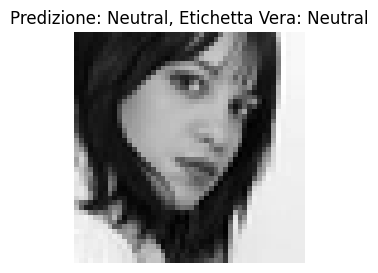

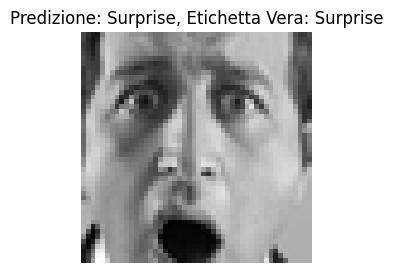

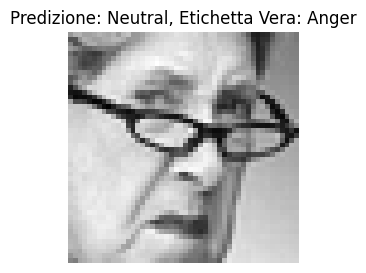

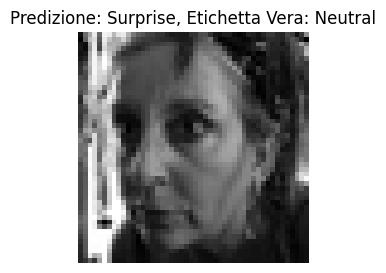

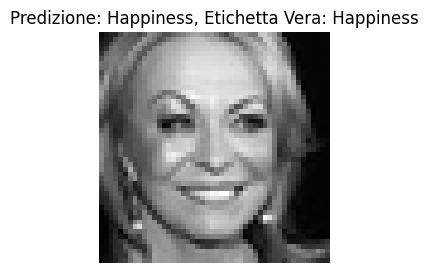

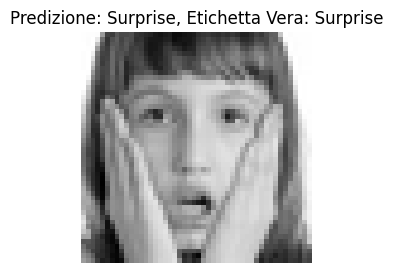

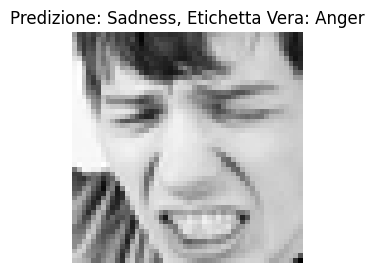

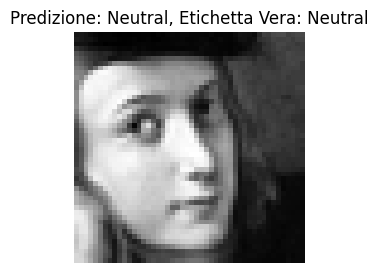

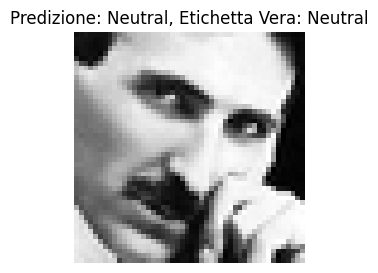

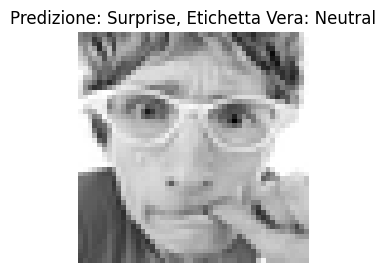

In [64]:
classi_predette = np.argmax(prediction, axis=1)
classi_vere = np.argmax(y_test, axis=1)
class_names = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt','Unknown']
num_images = 10
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)
# Visualizza le prime 5 immagini con le predizioni
for i in random_indices:
    plt.figure(figsize=(3,3))
    plt.imshow(X_test[i], cmap='gray')  # Rimuovi 'cmap' se le immagini sono a colori
    plt.title(f"Predizione: {class_names[classi_predette[i]]}, Etichetta Vera: {class_names[classi_vere[i]]}")
    plt.axis('off')
    plt.show()

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Supponendo che tu abbia già queste variabili:
# classi_predette = np.argmax(prediction, axis=1)
# classi_vere = np.argmax(y_test, axis=1)
# class_names = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt', 'Unknown']

# Calcola la matrice di confusione
cm = confusion_matrix(classi_vere, classi_predette)


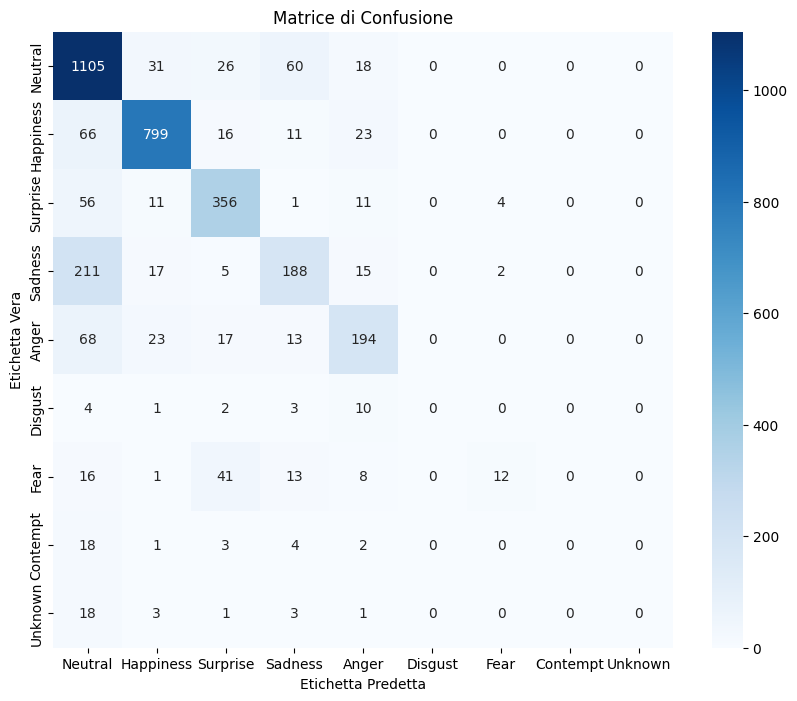

In [74]:
# Visualizza la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')
plt.title('Matrice di Confusione')
plt.show()